# Praktische Optimierung Blatt 02
### Tobias Lotz:  217856 <br>
### Alexander van der Staay:  185444

In [2]:
from scipy.optimize import minimize, minimize_scalar
import numpy as np
import matplotlib.pyplot as plt

# Aufgabe 1

In [140]:
def f1(x): return (x + 5)**2
def f2(x): return (x + 3)**2 - 5 * np.cos(5 * x)

In [141]:
BFGS1     = minimize(f1,  x0=0, method='BFGS')
L_BFGS_B1 = minimize(f1,  x0=0, method='L-BFGS-B')
BRENT1    = minimize_scalar(f1, method='Brent')

In [60]:
BFGS2     = minimize(f2,  x0=0, method='BFGS')
L_BFGS_B2 = minimize(f2,  x0=0, method='L-BFGS-B')
BRENT2    = minimize_scalar(f2, method='Brent')

In [63]:
print(f'------------------------Ergebnisse f1----------------------------')
print(f'BFGS:\t\tx: {BFGS1.x[0] : .2f}\tf1(x): {BFGS1.fun : .2f}')
print(f'L_BFGS_B:\tx: {L_BFGS_B1.x[0] : .2f}\tf1(x): {L_BFGS_B1.fun : .2f}')
print(f'BRENT:\t\tx: {BRENT1.x : .2f}\tf1(x): {BRENT1.fun : .2f}')
print(f'------------------------Ergebnisse f2----------------------------')
print(f'BFGS:\t\tx: {BFGS2.x[0] : .2f}\tf1(x): {BFGS2.fun : .2f}')
print(f'L_BFGS_B:\tx: {L_BFGS_B2.x[0] : .2f}\tf1(x): {L_BFGS_B2.fun : .2f}')
print(f'BRENT:\t\tx: {BRENT2.x : .2f}\tf1(x): {BRENT2.fun : .2f}')

------------------------Ergebnisse f1----------------------------
BFGS:		x: -5.00	f1(x):  0.00
L_BFGS_B:	x: -5.00	f1(x):  0.00
BRENT:		x: -5.00	f1(x):  0.00
------------------------Ergebnisse f2----------------------------
BFGS:		x: -2.52	f1(x): -4.77
L_BFGS_B:	x: -4.99	f1(x): -0.96
BRENT:		x: -0.05	f1(x):  3.86


### Plot der Funktion $f_1$

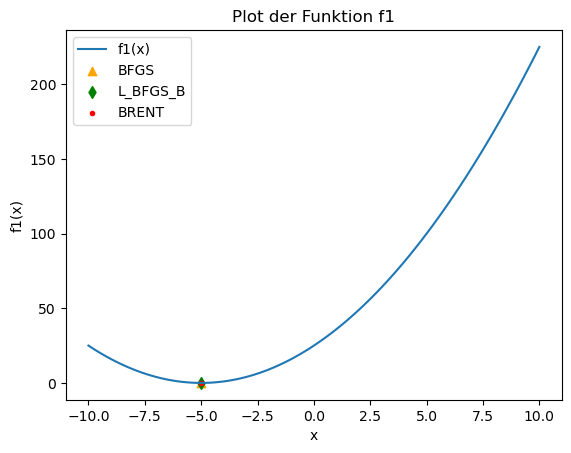

In [59]:
fig, ax = plt.subplots()

x = np.linspace(-10, 10, 101)
y = f1(x)

plt.title('Plot der Funktion f1')
plt.xlabel('x')
plt.ylabel('f1(x)')
ax.set_axisbelow(True)
ax.plot(x, y)
b1 = ax.scatter(BFGS1.x[0], BFGS1.fun, color="orange", marker='^')
lb1 = ax.scatter(L_BFGS_B1.x[0], L_BFGS_B1.fun, color="green", marker='d')
br1 = ax.scatter(BRENT1.x, BRENT1.fun, color="red", marker='.')
plt.legend(labels=['f1(x)', 'BFGS', 'L_BFGS_B', 'BRENT'])

### Beurteilung Ergebnisse $f_1$ 
Die Werte der 3 Optimierungsverfahren sind alle ungefähr identisch. <br>
Der Startwert $x_0 = 0$ ermöglicht es den Verfahren das lokale Minimum zu finden. <br>
Da die Funktion $f_1$ konvex ist, handelt es sich auch um das globale Minimum. 

### Plot der Funktion $f_2$

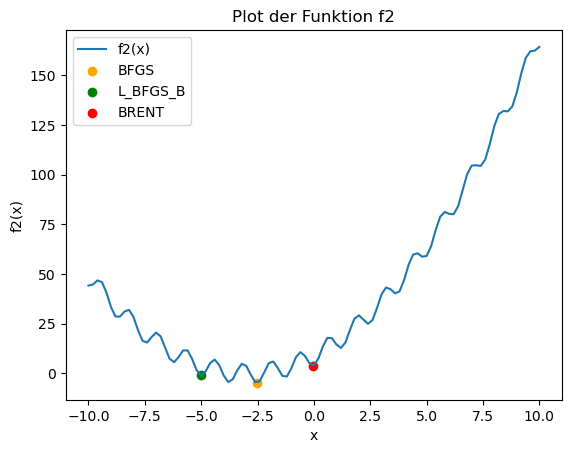

In [193]:
fig, ax = plt.subplots()

x = np.linspace(-10, 10, 101)
y = f2(x)

plt.title('Plot der Funktion f2')
plt.xlabel('x')
plt.ylabel('f2(x)')
ax.set_axisbelow(True)
ax.plot(x, y)
b1 = ax.scatter(BFGS2.x[0], BFGS2.fun, color="orange")
lb1 = ax.scatter(L_BFGS_B2.x[0], L_BFGS_B2.fun, color="green")
br1 = ax.scatter(BRENT2.x, BRENT2.fun, color="red")
plt.legend(labels=['f2(x)', 'BFGS', 'L_BFGS_B', 'BRENT'])

### Beurteilung Ergebnisse $f_2$
Die Funktion $f_2$ ist grobstrukturell auch eine quadratische Funktion genau wie $f_1$. Sie verläuft allerdings "zackenartig" und verfügt somit über sehr viele lokale Minima. Die 3 Abstiegsverfahren konvergieren hier alle gegen unterschiedliche lokale Minima, wobei __BFGS__ gegen das lokale Minimum konvergiert.

# Aufgabe 2

### Implementation

In [178]:
# x0 ist ein numpy.array auch wenn nur ein 1-dim. X-Vektor verwendet wird, also np.array([x])
def kompasssuche(f:callable, x0:np.ndarray, s0:float, theta:float, iters:int) -> dict:
    # Initialisierung der Historien
    n = x0.shape[0]
    x_h = [x0]
    s_h = [s0]
    f_h = [f(x0)]
    D = []
    
    # Die Vektoren e1, ..., en, -e1, ..., -en generieren und and D anhängen
    for i in range(n):
        d = np.zeros_like(x0)
        d[i] = 1
        D.append(d)

    for i in range(n):
        d = np.zeros_like(x0)
        d[i] = -1
        D.append(d)

    x_curr = x0
    s_curr = s0
    f_curr = f(x0)

    for _ in range(1, iters+1):
        # Funktion an aktueller Stelle auswerten

        # Check ob das If der Kompasssuche jemals True war
        found_d = False

        for d in D:
            # Funktion an der Stelle auswerten
            f_d = f(x_curr + s_curr * d)
            if f_d < f_curr:
                x_curr = x_curr + s_curr * d
                f_curr = f_d
                found_d = True
                break

        # Fals die Bedingung nie erfüllt wurde
        if not found_d:
            s_curr *= theta

        # aktuelle Werte Speichern
        x_h.append(x_curr)
        s_h.append(s_curr)
        f_h.append(f_curr)
        
    return {'iters' : iters,
            'x_history' : x_h, 
            's_history' : s_h, 
            'fun_history' : f_h, 
            'fun' : f_h[iters], 
            'x' : x_h[iters]}

### Ergebnisse

In [325]:
# Vektorwertige Funktionen
def f1(x): return (x[0] + 5)**2
def f2(x): return (x[0] + 3)**2 - 5 * np.cos(5 * x[0])
def f3(x): return x[0]**2 + x[1]**2
def f4(x): return x[0] * np.sin(x[0]) + 3 * x[1]**2

### a)

In [180]:
# Helperfunktion
def find_best_params(f, xl, sl, thetal, iters):
    best_x   = 10000
    best_fun = 10000
    best_iters = 10000
    best_theta = 10000
    best_s = 10000
    for x in xl:
        for s in sl:
            for theta in thetal:
                for it in iters:
                    res = kompasssuche(f, x, s0=s, theta=theta, iters=it)
                    fun_res = res['fun']
                    fun_hist = res['fun_history']
                    if fun_res < best_fun:
                        best_x = x
                        best_fun = fun_res
                        best_iters = np.array(fun_hist).argmin()
                        best_theta = theta
                        best_s = s
                    elif fun_res == best_fun:
                        curr_iters = np.array(fun_hist).argmin() 
                        if curr_iters < best_iters:
                            best_x = x
                            best_fun = fun_res
                            best_iters = curr_iters
                            best_theta = theta
                            best_s = s
    return {'x0' : best_x, 'fun' : best_fun, 's0' : best_s, 'theta' : best_theta, 'iters' : best_iters}

In [181]:
find_best_params(f1, [np.array([3]), np.array([9])], [0.5, 4.0], [0.3, 0.8], [20])

{'x0': array([3]), 'fun': 0.0, 's0': 4.0, 'theta': 0.3, 'iters': 2}

### Beste params für $f_1$
$x0 = 3$ <br>
$s0 = 4.0$ <br>
$theta = 0.3$ <br> 

Die Kompasssuche benötigt 2 Iterationen um das Minimum zu finden.

### b)

In [171]:
find_best_params(f2, [np.array([3]), np.array([9])], [0.5, 4.0], [0.3, 0.8], [20])

{'x0': array([3]),
 'fun': -4.766829105949047,
 's0': 4.0,
 'theta': 0.3,
 'iters': 19}

### Beste params für $f_2$
$x0 = 3$ <br>
$s0 = 4.0$ <br>
$theta = 0.3$ <br> 

Die Kompasssuche benötigt 19 Iterationen um das Minimum zu finden.

### c)

In [173]:
find_best_params(f3, [np.array([3, 3]), np.array([9, 9])], [0.5, 4.0], [0.3, 0.8], [20])

{'x0': array([3, 3]), 'fun': 0.0, 's0': 0.5, 'theta': 0.3, 'iters': 12}

### Beste params für $f_3$
$x0 = [3, 3]$ <br>
$s0 = 0.5$ <br>
$theta = 0.3$ <br> 

Die Kompasssuche benötigt 12 Iterationen um das Minimum zu finden.

In [174]:
find_best_params(f4, [np.array([3, 3]), np.array([9, 9])], [0.5, 4.0], [0.3, 0.8], [20])

{'x0': array([9, 9]),
 'fun': -7.999892272057739,
 's0': 0.5,
 'theta': 0.3,
 'iters': 20}

### Beste params für $f_4$
$x0 = [3, 3]$ <br>
$s0 = 0.5$ <br>
$theta = 0.3$ <br> 

Die Kompasssuche benötigt 20 Iterationen um das Minimum zu finden.

In [327]:
res1 = kompasssuche(f1, x0=np.array([3]), s0=4.0, theta=0.3, iters=20)
res2 = kompasssuche(f2, x0=np.array([3]), s0=4.0, theta=0.3, iters=20)
res3 = kompasssuche(f3, x0=np.array([3, 3]), s0=0.5, theta=0.3, iters=20)
res4 = kompasssuche(f4, x0=np.array([3, 3]), s0=0.5, theta=0.3, iters=20)

# Plots

In [330]:
# nicht vektorwertige Funktionen
def f1(x): return (x + 5)**2
def f2(x): return (x + 3)**2 - 5 * np.cos(5 * x)
def f3(x, y): return x**2 + y**2
def f4(x, y): return x * np.sin(x) + 3 * y**2

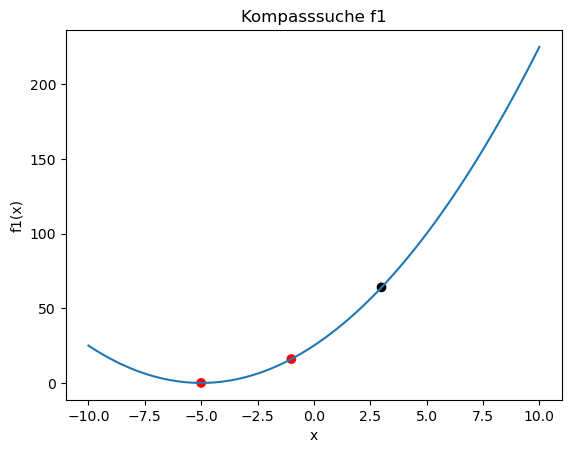

In [211]:
fig, ax = plt.subplots()

x = np.linspace(-10, 10, 101)
y = f1(x)
x_hist = res1['x_history']
y_hist = res1['fun_history']

plt.title('Kompasssuche f1')
plt.xlabel('x')
plt.ylabel('f1(x)')
ax.set_axisbelow(True)
ax.plot(x, y)
ax.scatter(x_hist[:3], y_hist[:3], color=['black', 'red', 'red'])

Der Weg hier ist recht selbsterklärend. Der Startpunkt und die Schrittweite ermöglichen es dem Algorithmus nach 2 Iterationen im Minimum zu landen.

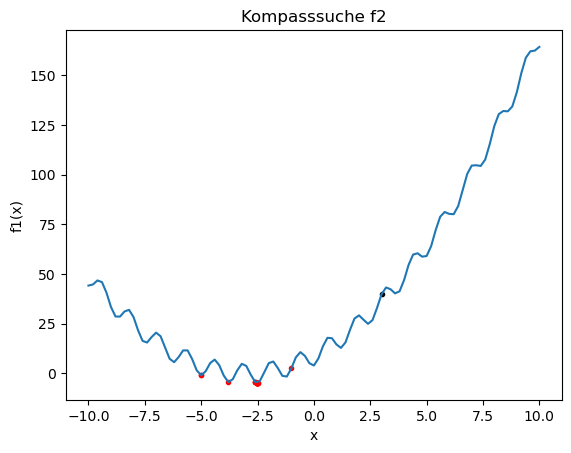

In [209]:
fig, ax = plt.subplots()

x = np.linspace(-10, 10, 101)
y = f2(x)
x_hist = res2['x_history']
y_hist = res2['fun_history']

plt.title('Kompasssuche f2')
plt.xlabel('x')
plt.ylabel('f1(x)')
ax.set_axisbelow(True)
ax.plot(x, y)
ax.scatter(x_hist[0], y_hist[0], color='black', marker='.')
ax.scatter(x_hist[1:20], y_hist[1:20], color="red", marker='.')

Der "Weg" den der Algorithmus zurücklegt, startet im Schwarzen Punkt (ganz rechts). <br>
Der nächste Punkt ist der 2. von rechts. <br>
Er springt zum Punkt ganz links, denn die Schrittweite von 4.0 überspringt das globale Minimum. <br>
Nun wird die Schrittweite verringert, da sonst kein Punkt mit geringerem Funktionswert erreichbar ist. <br>
Die kleinere Schrittweite ermöglicht jetzt kleinere Schritte in Richtung globales Minimum. <br>
In dem kleinen Tal bei $x = -2.5$ wird die Schrittweite sehr stark verkleinert und die x-Werte nähern sich sehr langsam dem Minimum, um dieses Tal nicht wieder zu verlassen. 

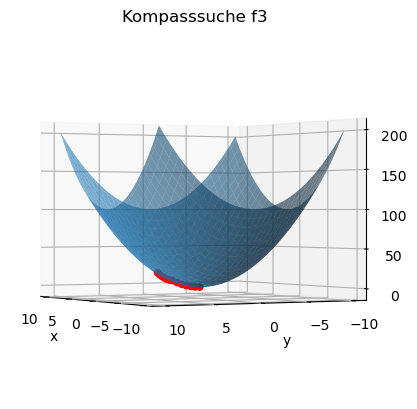

In [314]:
ax = plt.figure().add_subplot(projection='3d')

x = np.linspace(-10, 10, 101)
y = np.linspace(-10, 10, 101)
z = f3(x,y)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
x_hist = res3['x_history']
z_hist = res3['fun_history']

plt.title('Kompasssuche f3')
plt.xlabel('x')
plt.ylabel('y')
ax.set_axisbelow(True)
ax.plot_surface(X, Y, Z, alpha=0.6)
x_h = np.concatenate(x_hist[:13])[np.arange(0,25, 2)]
y_h = np.concatenate(x_hist[:13])[np.arange(1,26, 2)]
ax.scatter3D(x_h, y_h, z_hist[:13], color='red', alpha=1)
ax.view_init(0, 150)

Da die Funktion $f_3$ streng konvex ist und die Schrittgröße so gewählt ist, das das Minimum nicht übersprungen wird, liegt hier ähnlich wie bei $f_1$ eine einfache schrittweise Annäherung and das Minimum vor.

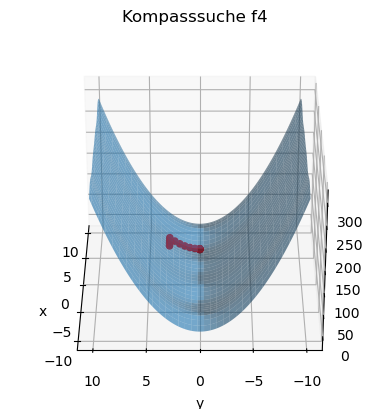

In [376]:
ax = plt.figure().add_subplot(projection='3d')

x = np.linspace(-10, 10, 101)
y = np.linspace(-10, 10, 101)
z = f4(x,y)
X, Y = np.meshgrid(x, y)
Z = X * np.sin(X) + 3 * Y**2
x_hist = res4['x_history']
z_hist = res4['fun_history']

plt.title('Kompasssuche f4')
plt.xlabel('x')
plt.ylabel('y')
ax.set_axisbelow(True)
ax.plot_surface(X, Y, Z, alpha=0.6)
x_h = np.concatenate(x_hist)[np.arange(0,41, 2)]
y_h = np.concatenate(x_hist)[np.arange(1,42, 2)]
ax.scatter3D(x_h, y_h, z_hist, c='red', alpha=1)
ax.view_init(30, 180)

Hier Wandern die Punkte zunächst 5 Schritte in Richtung der x-Achse, da kleine Verkleinerungen der Funktionswerte vorliegen. Ab $x = 5$ wandern die y-Werte auf $y = 0$ zu. Da keine großen Verbesserungen mehr möglich sind, wird die Schrittweite stark reduziert und anschließend werden ein paar letzte Schritte in negativer x-Richtung vorgenommen.